<a href="https://colab.research.google.com/github/Yversjcl/Proyecto_predicciones_Coder/blob/main/Desaf%C3%ADo_FeatureSelection_Yvers_Caruzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío_FeatureSelection
**Migración de clientes Prepago como estrategia para la fidelización de clientes de telco una oportunidad para rentabilizar**

#Abstract

El mundo de las telecomunicaciones, está cada vez más centrado en las soluciones de conectividad y demanda cada vez más creciente de una red mucho más potente, por fenomenos centrados en las transformaciones que nuestra forma de vida demanda en los ambitos tanto profesionales como de entretenimiento.

En terminos comerciales, al ser este un mundo escencialmente digital, producto de una revolución que inició a partir del arribo de internet a la vida moderna, y que se ha potenciado a partir de la coyuntura postpandémica,  los players nuevos y tradicionales que hoy ofrecen soluciones en el ambito telco se han igualmente potenciado y transformado.

Este contexto implica retos para las empresas que se centran en la construcción de estas soluciones de conectividad y comunicación, retos que van desde la calidad de la experiencia de sus clientes, hasta las necesidades cada vez más crecientes de rentabilizar su operaciones con la ambición puesta en generar fidelización y permanencia de los usuarios.

Según datos de la subsecretaria de telacomunicaciones (Subtel) el 30% de los clientes abonados con lineas activas corresponden a clientes prepago, esto es un segmento de un poco más de 7MM de lineas que pertenecen a un potencial mercado que permitiría incrementar el segmento de clientes con cuenta a las empresas del sector.

Esta misma relación procentual se vive al interior de las empresas que forman parte de los players del mercado y que han iniciado la implementación de iniciativas de migración de clientes, *iniciativas que se pretenden sean de impacto y bese impacto pasa por comprender los datos asociados a estas iniciativas, como se relacionan y donde están las oportunidades*.

Esta permanencia pasa por entregar servicios que vinculen en mayor medida a estos usuarios con las marcas, a partir de estrategias puntuales como el potenciamiento de la migración de clientes prepago al mundo postpago, que genere vinculos más allá de la facturación y que entrege igualmente beneficios adicionales como alianzas con otras marcas, descuentos, accesos a tickeras entre otras.

**Lo que pretendemos responder**

relacionado a este contexto, nos planteamos conocer:

* Cómo se viene comportando la iniciativa de migración de clientes de servicios prepago al mundo postpago.
* Cómo es el viaje del cliente al que se le presenta la oferta para cambiarse del tipo de servicio.
* Es posible predecir la cantidad de clientes que realizaran este cambio por tipo de cliente.

**Alcance de los análisis**

* Iniciamos con analisis basico de nuestros datos a nievel de metadata y estadistica básica, y en segunda instancia se recurre al analisis de *missing data* para mirar de forma rápida el patron de valores faltantes y comprender la distribución y completitud de los datos, así poder normalizar y seguir con ralaciones y outliers.

1. Importamos las librerias a utilizar y activamos nuestro espacio de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, \
    r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Conectamos con nuestro espacio de trabajo de google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargarmos el dataset
data = pd.read_csv('/content/drive/MyDrive/dataset_MIS_T.csv', delimiter=';')

2. Revisamos la metadata de nuestro dataset

In [4]:
#EDA (Análisis Exploratorio de Datos)
# Visualizar las primeras filas del dataset
data.head()

,FECHA,Tipo_Cliente,Oferta,Escucha_Oferta_Mig,Acepta_Mig,Valida_Rut,EvalCredito,T&C,migradoOK,Envio_RPA
0,01-05-2022 0:00,CON_ID,PO_POS,743,69,26.0,1,0,5,0
1,01-05-2022 0:00,CON_ID,CC_SIM_EXTRA,316,22,3.0,0,0,17,0
2,01-05-2022 0:00,CON_ID,PO_POS,4,0,NaN,0,0,7,0
3,02-05-2022 0:00,CON_ID,CC_SIM_EXTRA,346,22,8.0,0,0,17,0
4,02-05-2022 0:00,CON_ID,PO_POS,10,0,NaN,0,0,9,0


In [5]:
# Obtener información sobre las columnas y los tipos de datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FECHA               3134 non-null   object 
 1   Tipo_Cliente        3134 non-null   object 
 2   Oferta              3134 non-null   object 
 3   Escucha_Oferta_Mig  3134 non-null   int64  
 4   Acepta_Mig          3134 non-null   int64  
 5   Valida_Rut          2677 non-null   float64
 6   EvalCredito         3134 non-null   int64  
 7   T&C                 3134 non-null   int64  
 8   migradoOK           3134 non-null   int64  
 9   Envio_RPA           3134 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 245.0+ KB
None


In [6]:
# Obtener estadísticas descriptivas del dataset
data.describe()

,Escucha_Oferta_Mig,Acepta_Mig,Valida_Rut,EvalCredito,T&C,migradoOK,Envio_RPA
count,3134.000000,3134.000000,2677.000000,3134.000000,3134.000000,3134.000000,3134.000000
mean,2000.500319,230.028717,109.908853,10.072431,8.431717,1.533184,5.666879
std,2308.366397,325.639745,152.706052,15.757828,13.601962,4.764818,12.276397
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,310.000000,20.000000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,1098.500000,101.000000,45.000000,3.000000,3.000000,0.000000,0.000000
75%,3271.000000,294.750000,131.000000,13.000000,10.000000,1.000000,5.000000
max,14300.000000,2886.000000,1445.000000,109.000000,93.000000,82.000000,93.000000


3. Revisamos y tratamos los posibles datos nulos

<Axes: >

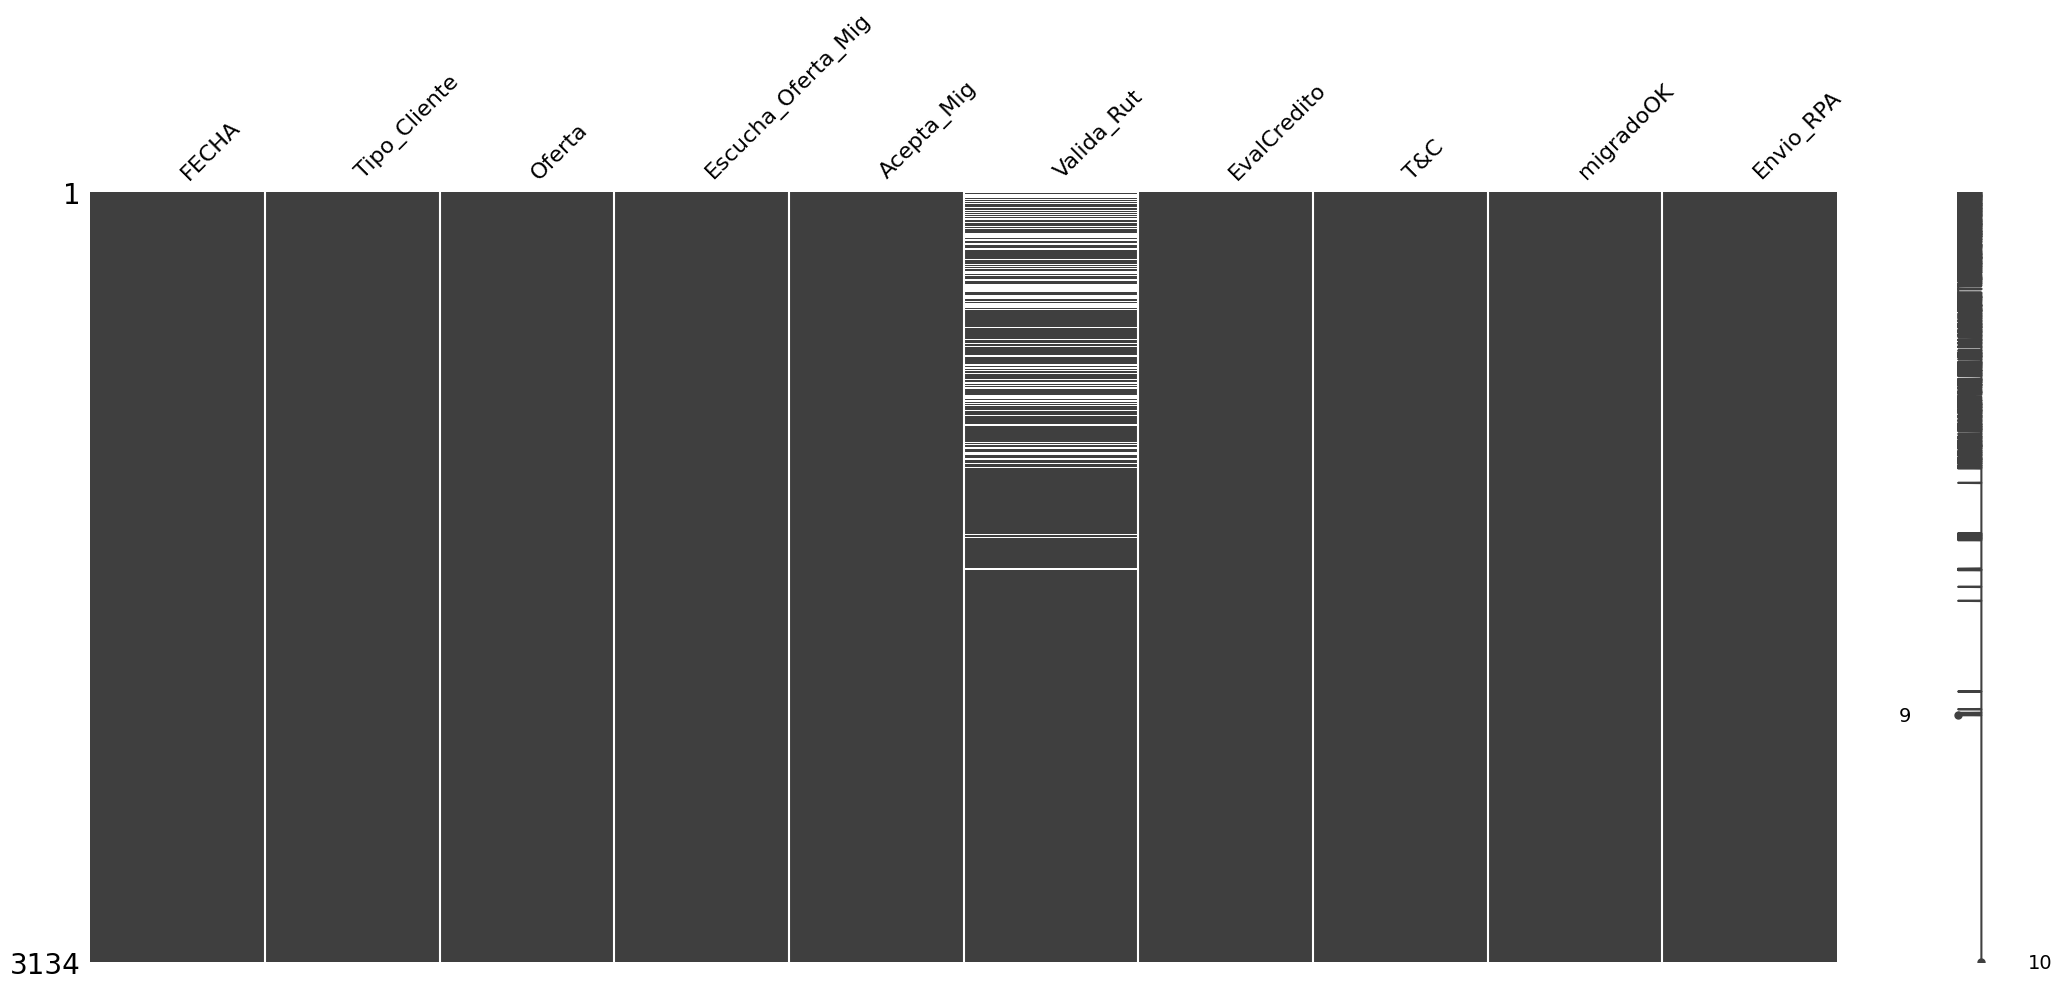

In [7]:
#Revisamos de manera previa el balance de existencia de datos perdidos.
import missingno as msno

msno.matrix(data)

In [8]:
#Revisamos los datos nulos presentes en el dataset
data.isnull().sum()

FECHA                   0
Tipo_Cliente            0
Oferta                  0
Escucha_Oferta_Mig      0
Acepta_Mig              0
Valida_Rut            457
EvalCredito             0
T&C                     0
migradoOK               0
Envio_RPA               0
dtype: int64

In [9]:
#Revisamos los datos de la variable valida rut por el Q de NaN encontyrados en la primera revisión.
data['Valida_Rut']

0        26.0
1         3.0
2         NaN
3         8.0
4         NaN
        ...  
3129    175.0
3130     78.0
3131    269.0
3132    217.0
3133    266.0
Name: Valida_Rut, Length: 3134, dtype: float64

In [10]:
# Rellenar campos en blanco de una columna específica, por ejemplo, 'columna1', con el valor 0
data = data.fillna(0)

<Axes: >

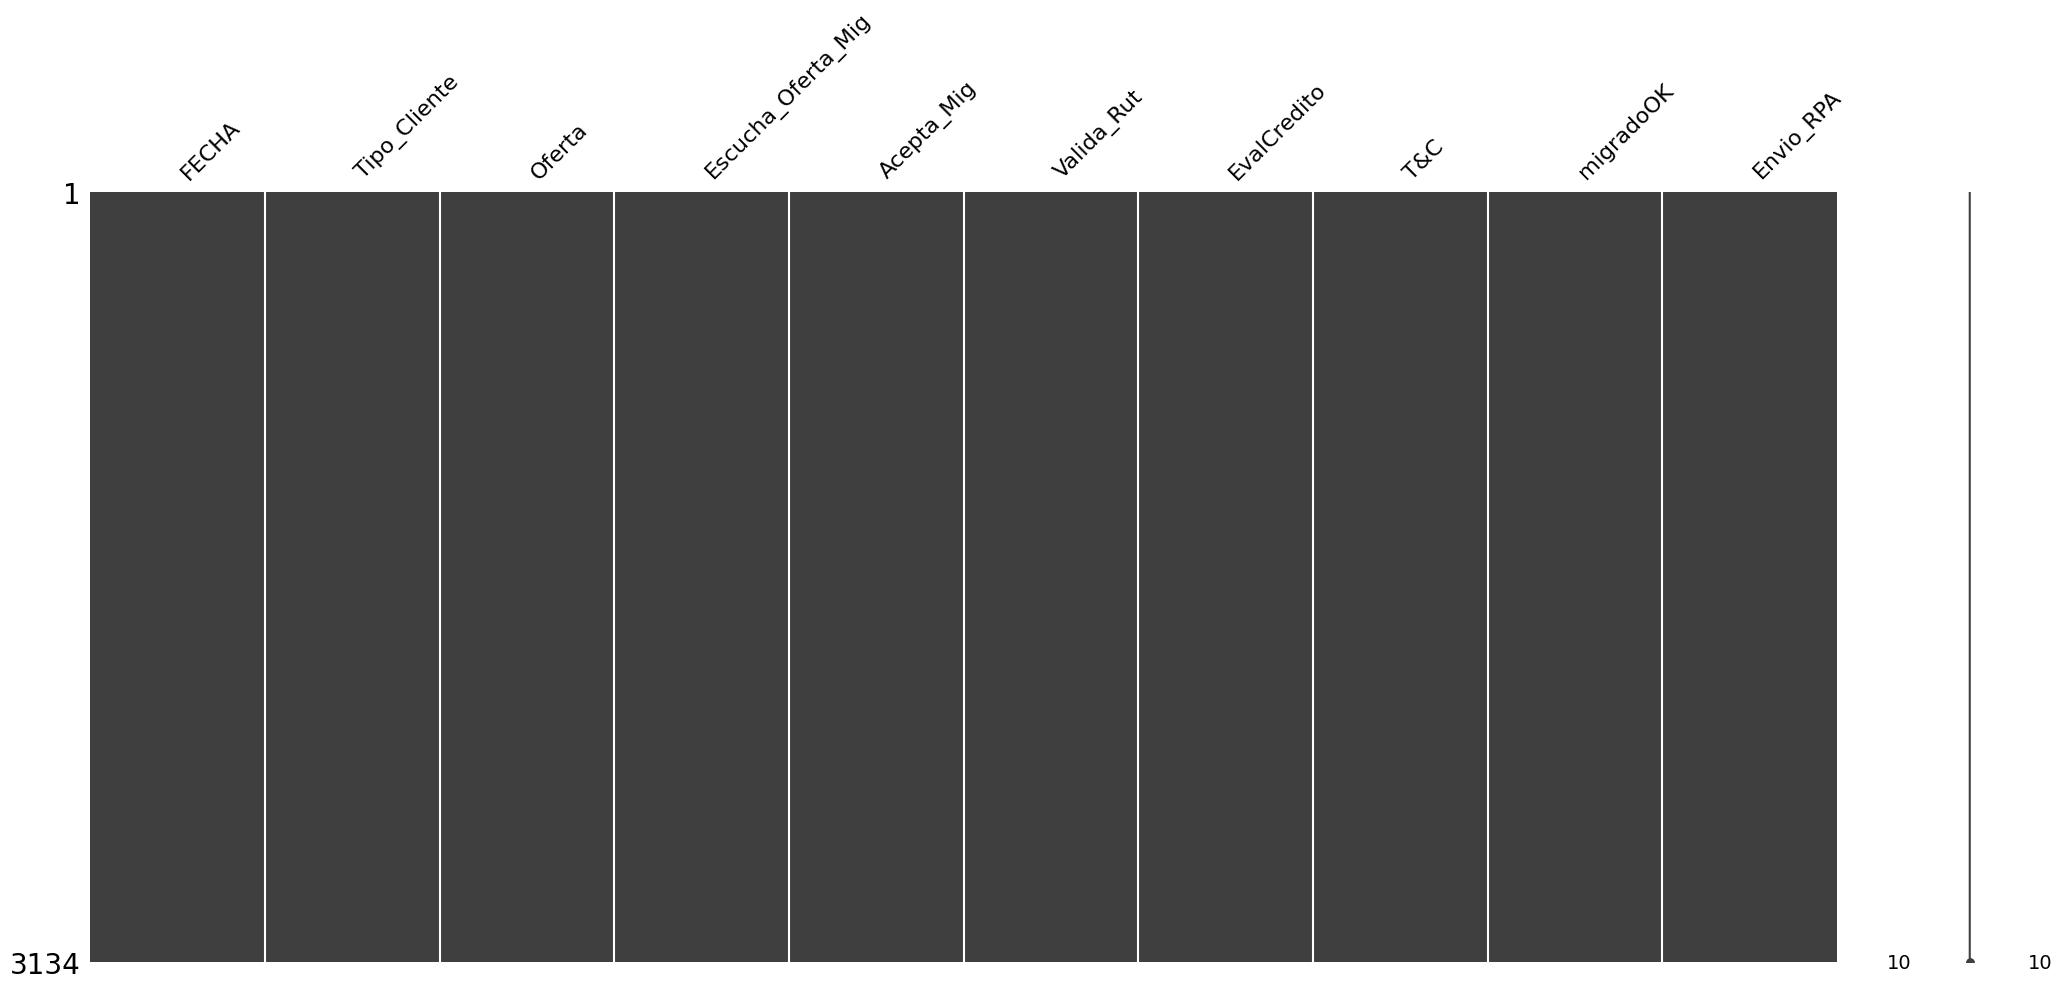

In [11]:
#Revisamos que el tratamiento de los datos nulos o perdidos haya sido ejecutada de manera cotrrecta.
import missingno as msno

msno.matrix(data)

In [12]:
# Convertir columnas específicas de tipo float a int
columnas_float = ['Valida_Rut']
data[columnas_float] = data[columnas_float].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FECHA               3134 non-null   object
 1   Tipo_Cliente        3134 non-null   object
 2   Oferta              3134 non-null   object
 3   Escucha_Oferta_Mig  3134 non-null   int64 
 4   Acepta_Mig          3134 non-null   int64 
 5   Valida_Rut          3134 non-null   int64 
 6   EvalCredito         3134 non-null   int64 
 7   T&C                 3134 non-null   int64 
 8   migradoOK           3134 non-null   int64 
 9   Envio_RPA           3134 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 245.0+ KB


**Notas de la decisión**

Acá se decide rellenar con (0) dado que al ser binarios en la captura de los datos y su totalización estos campos resultan ser ceros y por ello al no encontrar registros que sumar genera el NaN, es decir fueron clientes que no pasaron por esa parte del flujo.

4. Revisamos las variables de interés de nuestro datasat

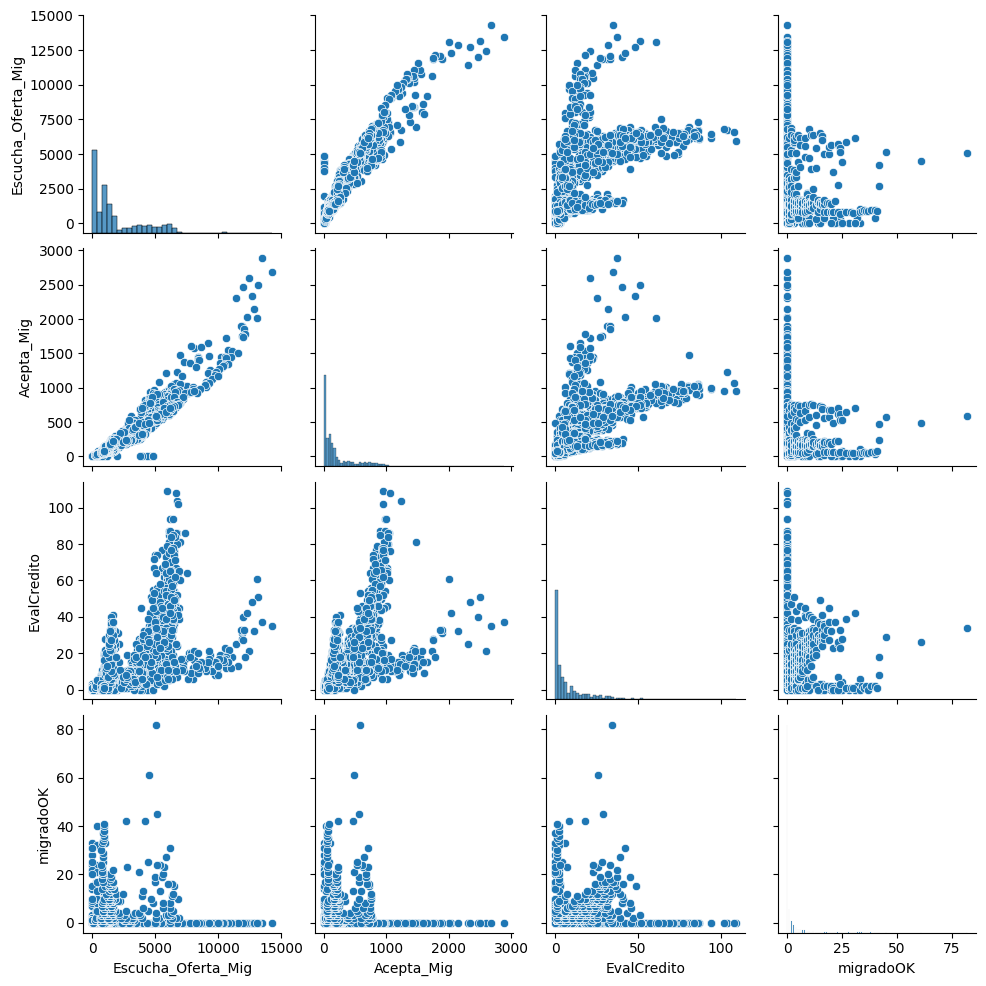

In [14]:
# Análisis Bivariado
# Gráfico de dispersión de variables numéricas
sns.pairplot(data, vars=['Escucha_Oferta_Mig', 'Acepta_Mig', 'EvalCredito', 'migradoOK'])

<Axes: xlabel='Tipo_Cliente', ylabel='count'>

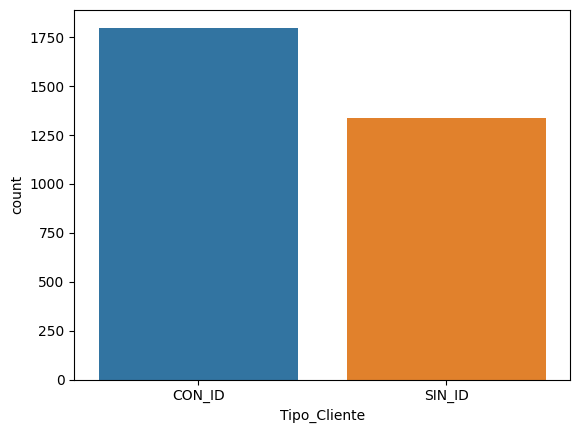

In [15]:
# Gráfico de barras de una variable categórica
sns.countplot(x='Tipo_Cliente', data=data)

<Axes: >

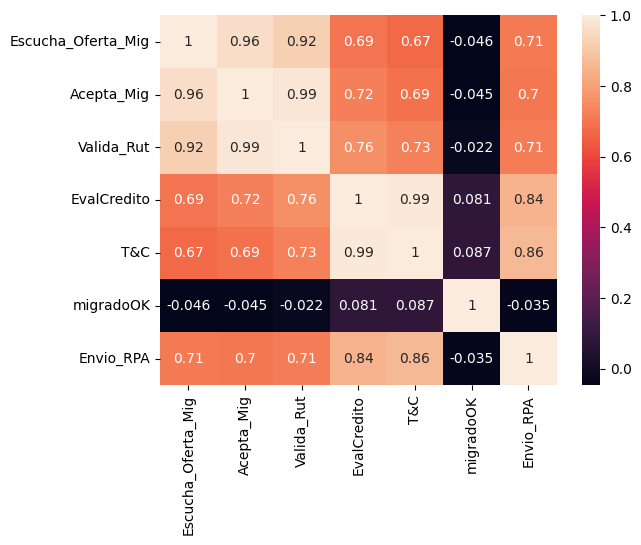

In [16]:
#Análisis Multivariado
# Matriz de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

**¿Que nos muestran los datos?**

* Se aprecia relación lineal entre las variables de *Escucha oferta* y *Acepta Migración*, y entre las variables de *Acepta Migración* y *Valida rut*,así como va cambiando la realción a medida de que el cliente pasa las demas etapas de flujo de migraciones, estos cambios parecieran indicar algunas oportunidades en el proceso de CX para delinear los momentos del viaje con mayor homegeneidad ya que las relaciones observadas y el comportamiento de la matriz de correlación presenta estas tres variables con un alto grado de relación, posteriormente se encuentran las variables de *Evaluación de crédito* y *Terminos y condiciones* y finalmente con menos del 1% de tracción *migradoOk*

6. Análisis de Outliers

<Axes: >

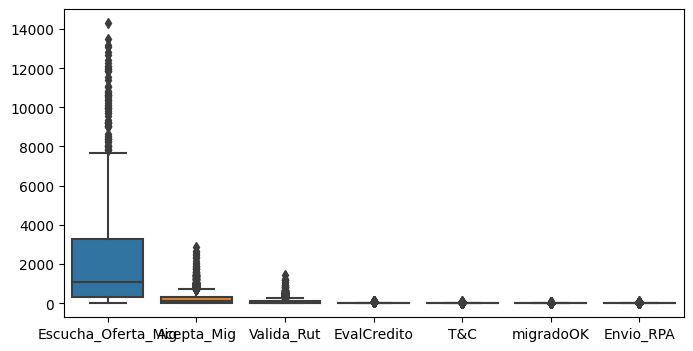

In [17]:
#Análisis de Outliers
# Gráfico de caja de una variable numérica
#sns.boxplot(x='Escucha_Oferta_Mig', data=data)
plt.figure(figsize=[8,4])
sns.boxplot(data = data)

In [18]:
#Tratamiento de outliers
def detect_outliers(col):

  outlier = []
  threshold = 2
  mean = np.mean(col)
  std = np.std(col)

  for i in col:
    z_score = (i - mean )/ std
    if np.abs(z_score) > threshold:
      outlier.append(i)
  return outlier

**Notas decisión outliers**

Vistos la relacion entre las variables *Escucha_Oferta* y los *migradook* y siendo el objetivo de la iniciativa el incremento de las MIS, y cuya relación muestra que a mayor escucha de la oferta más migraciones ocurren, se mantienen los outliers de la variable *Escucha_Oferta*, ya que en terminos de la proyección que se pretende su permanencia en el dataset incremetaran hipoteticamente las MIS kde casos con mayor escucha de estas ofertas.

7.- Encoding / Modelling con Regresión

7.1.- Ronda I
**Regresión Lineal**

In [19]:
# Seleccionar las características relevantes
features = ['Escucha_Oferta_Mig', 'Acepta_Mig', 'Valida_Rut', 'EvalCredito', 'T&C', 'Envio_RPA']

In [20]:
# Crear el conjunto de características y el objetivo
X = data[features]
y = data['migradoOK']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [22]:
# Crear el modelo de regresión
regression_model = LinearRegression()

In [23]:
# Entrenar el modelo
regression_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

In [25]:
y_pred

array([ 1.01412921,  1.15344951,  1.1500089 ,  0.43646417,  1.20929681,
        0.50360198,  1.20929681,  1.29890632,  1.51581897,  1.51762385,
        1.1186225 ,  1.24103335,  1.26087104,  1.10385616,  0.32709132,
        1.40356155,  2.56107054,  3.38732713,  2.48113871,  2.22812849,
        1.79881654,  1.19615403,  1.86339092,  7.25455174,  1.90613315,
        1.21094151,  1.21554911,  1.40523167,  0.04514383,  1.71111   ,
        2.05453685,  0.84064944,  1.20929681,  1.20929681,  1.34663706,
        1.61121201,  1.20984504,  0.70691028,  0.01570519, -2.65214906,
        2.13058762,  1.47239958,  0.84521616,  0.51426248,  1.20929681,
        1.41592146,  1.20984504,  2.05305436,  1.38159493,  1.07616144,
        1.21878257,  1.49216298,  1.53036828,  3.23479894,  1.44370373,
        1.29514265,  1.50750008,  0.7582573 ,  1.18630067,  1.09716859,
        1.20929681,  2.95857658, -1.7729341 ,  1.9746689 ,  2.73572997,
        0.41981537,  3.81822159,  1.21094151, -0.83812001,  1.39

In [26]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
# Imprimir resultados de medicion de rendimiento del modelo
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)

Error cuadrático medio (MSE): 41.17135950516073
Coeficiente de determinación (R^2): 0.0030144471846292875


In [28]:
# Calcula el RMSE y MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

In [29]:
# Imprime los resultados
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 6.416491214453639
MAE: 2.2234697348678867


**Comentarios sobre el proceso y rendimiento del modelo**

Luego de evaluar los resultados de las metricas para el modelo de regresión lineal, se aprecia que el R2, logra explicar solo el .53% de los resolytados predecidos a la variable objetivo, así como la MSE, MAE y RMSE muestran errores importantes en la explicación de la mayor parte de la variabilidad de los datos de la variable objetivo que para este estudio es ***migradoOK***

Por lo anterior, se realizará segunda ronda usando modelo: *Random Forest (Regresión)*, con el objetivo de analizar el rendimiento del citado modelo de cara al objetivo del estudio.

7.2.- Ronda II
**Random Forest** (Regresión)

In [30]:
#Encoding y manejo de valores faltantes
# Codificación de variables categóricas
cat_features = ['Tipo_Cliente', 'Oferta']
num_features = ['Escucha_Oferta_Mig', 'Acepta_Mig', 'Valida_Rut', 'EvalCredito', 'T&C']
target = 'migradoOK'

In [31]:
# Manejo de valores faltantes
data_cleaned = data.dropna(subset=num_features + [target])

In [32]:
# Convertir columna 'FECHA' a características numéricas
data_cleaned['FECHA'] = pd.to_datetime(data_cleaned['FECHA']).astype(int)

In [33]:
# Codificación de variables categóricas
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
transformers = [('encoder', onehot_encoder, cat_features)]
column_transformer = ColumnTransformer(transformers, remainder='passthrough')

X = column_transformer.fit_transform(data_cleaned.drop(target, axis=1))
y = data_cleaned[target]

In [34]:
#Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [35]:
#Crear y entrenar el modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [37]:
y_pred

array([0.000e+00, 2.200e-01, 4.500e-01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 7.400e-01, 1.810e+00, 2.927e+01, 0.000e+00, 0.000e+00,
       4.000e-02, 9.040e+00, 1.000e-02, 2.300e-01, 3.540e+00, 5.370e+00,
       1.350e+00, 1.470e+00, 0.000e+00, 0.000e+00, 1.260e+00, 1.159e+01,
       2.000e+00, 0.000e+00, 0.000e+00, 1.720e+00, 2.100e-01, 2.190e+00,
       2.600e+00, 2.440e+00, 0.000e+00, 0.000e+00, 1.400e-01, 2.100e-01,
       0.000e+00, 0.000e+00, 2.100e-01, 0.000e+00, 2.220e+00, 5.200e-01,
       0.000e+00, 2.000e-02, 0.000e+00, 1.900e-01, 0.000e+00, 0.000e+00,
       0.000e+00, 1.210e+00, 1.000e-02, 0.000e+00, 0.000e+00, 2.590e+00,
       8.700e-01, 0.000e+00, 1.200e-01, 0.000e+00, 6.000e-02, 1.608e+01,
       2.000e-02, 4.000e+00, 0.000e+00, 9.300e-01, 1.480e+00, 0.000e+00,
       5.370e+00, 8.960e+00, 0.000e+00, 1.600e-01, 3.640e+00, 0.000e+00,
       3.310e+00, 0.000e+00, 4.780e+00, 2.900e-01, 1.750e+00, 2.000e-02,
       0.000e+00, 0.000e+00, 3.800e-01, 3.960e+00, 

In [38]:
# Calcular el Coeficiente de Correlación de Pearson
pearson_corr = np.corrcoef(y_test, y_pred)[0, 1]
print("Coeficiente de Correlación de Pearson:", pearson_corr)

Coeficiente de Correlación de Pearson: 0.6871940903003573


In [39]:
# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 23.10730987261147


In [40]:
## Coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.44044465899811003


In [41]:
# Varianza explicada
variance = explained_variance_score(y_test, y_pred)
print("Varianza explicada:", variance)


Varianza explicada: 0.4413835882164404


**Notas de la evaluación del modelo de Regresión**

En cuanto a las metricas obtenidas en esta segunda ronda de Feature Engineering, entrenamiento y predicción, las metricas indican para el R2 que es posible explicar aproximadamente el 44.04% de la variabilidad de los datos, esto es una mejora del rendimiento si se compara con la primera ronda de atributos, entrenamiento y predicción del modelo.

Lo anterior indica, que el modelo tiene un grado moderado de ajuste a los datos, pero aún existe una cantidad considerable de variabilidad que no puede ser explicada por el modelo, lo cual presenta oportunidades para mejorar este modelo. Sin embargo es posible indicar que existe una relación moderada entre las variables.

Es importante destacar que estas otras variables y factores se pueden integrar al análisis en aras de incrementar el desempeño del modelo y lograr una propuesta que impacte al indicador de conversión de esta campaña, esto a partir del % de correlación de las variables del modelo que se encuentran en el 68%.

De entrada, se obtiene el insight de la importancia de la oferta en cuanto a su muestra desde el punto de vista cuantitativo.

En resumen, estos resultados indican que el modelo tiene cierta capacidad para explicar la variabilidad en los datos, del mismo modo existe un . margen de mejora.



8.- Ingenieria de atributos y selección de variables

* En función de lo visto durante este tramo de la cursada Usaremos cuatro modelos para probar: **Logistic Regression**, **Decision Tree** **Random Forest** y **Support Vector Machine (SVM)**.

* El objetivo validar cual de los modelos posee un mejor rendimiento, construir las variables sinteticas y probar con menos dimensionalidad como funciona nuestro modelo de cara al comportamiento de las variables que mas aportan a la explicación del fenomeno.

In [42]:
#Creamos variables sintéticas adicionales
#Acá buscamos simplificar los momentos del flujo de migración de planes a dos fases que engloban el comportamiento de la iniciativa
data['fase_comercial'] = data['Escucha_Oferta_Mig'] + data['Acepta_Mig']
data['fase_legal'] = data['Valida_Rut'] + data['EvalCredito'] + data['T&C'] + data['Envio_RPA']

In [43]:
data

,FECHA,Tipo_Cliente,Oferta,Escucha_Oferta_Mig,Acepta_Mig,Valida_Rut,EvalCredito,T&C,migradoOK,Envio_RPA,fase_comercial,fase_legal
0,01-05-2022 0:00,CON_ID,PO_POS,743,69,26,1,0,5,0,812,27
1,01-05-2022 0:00,CON_ID,CC_SIM_EXTRA,316,22,3,0,0,17,0,338,3
2,01-05-2022 0:00,CON_ID,PO_POS,4,0,0,0,0,7,0,4,0
3,02-05-2022 0:00,CON_ID,CC_SIM_EXTRA,346,22,8,0,0,17,0,368,8
4,02-05-2022 0:00,CON_ID,PO_POS,10,0,0,0,0,9,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3129,04-03-2023 0:00,SIN_ID,PO_POS,4219,472,175,18,17,42,17,4691,227
3130,21-03-2023 0:00,SIN_ID,PO_POS,2691,231,78,8,6,42,6,2922,98
3131,17-03-2023 0:00,SIN_ID,PO_POS,5157,568,269,29,24,45,24,5725,346
3132,02-03-2023 0:00,SIN_ID,PO_POS,4483,489,217,26,21,61,21,4972,285


In [44]:
#Normalizamos las características de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
  #Probamos distintos modelos para elegir el mejor usando el Bias-Variance tradeoff

  models = {
      'Logistic Regression': LogisticRegression(),
      'Decision Tree': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'SVM': SVC()
  }

  best_model = None
  best_accuracy = 0

  for model_name, model in models.items():
      scores = cross_val_score(model, X_train, y_train, cv=5)
      avg_accuracy = np.mean(scores)
      print(f"{model_name} - Cross-Validation Accuracy: {avg_accuracy}")
      if avg_accuracy > best_accuracy:
          best_accuracy = avg_accuracy
          best_model = model_name

  print(f"\nEl mejor modelo es: {best_model}")


Logistic Regression - Cross-Validation Accuracy: 0.7326241134751774
Decision Tree - Cross-Validation Accuracy: 0.7280141843971631
Random Forest - Cross-Validation Accuracy: 0.7617021276595745
SVM - Cross-Validation Accuracy: 0.7326241134751774

El mejor modelo es: Random Forest


In [46]:
#Realizamos PCA sobre las variables usadas y explorar las cargas de los 2 primeros componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [47]:
# Explorar las cargas de los dos primeros componentes
component_1_loadings = pca.components_[0]
component_2_loadings = pca.components_[1]

In [48]:
# Obtener los nombres de las columnas para mostrar las cargas
column_names = X_pca

In [49]:
#Verificamos nuestras column names
column_names

array([[-1.3781697 ,  0.82857134],
       [-1.86509474,  2.87013999],
       [-1.68594561,  0.77313407],
       ...,
       [ 3.21202917, -0.91482022],
       [ 2.61835403, -0.73064516],
       [ 3.79800877, -1.07914161]])

In [50]:
#Obtenemos las column names para mostrar las cargas
column_names = X_pca

print("\nCargas del primer componente principal:")
for feature, loading in zip(column_names, component_1_loadings):
    print(f"{feature}: {loading}")

print("\nCargas del segundo componente principal:")
for feature, loading in zip(column_names, component_2_loadings):
    print(f"{feature}: {loading}")


Cargas del primer componente principal:
[-1.3781697   0.82857134]: 0.28340791565079204
[-1.86509474  2.87013999]: 0.08593899898614565
[-1.68594561  0.77313407]: -0.037420735483675985
[-1.85391605  2.73442021]: 0.39799461693613347
[-1.69256966  0.63404886]: 0.40069957953882157
[-1.28802093  0.58607644]: 0.3999269725687839
[-1.84574395  2.61238071]: 0.3839590589157861
[-1.69931475  0.50825546]: 0.3779403471250077
[-1.34750836  0.43618681]: 0.3764694063351825

Cargas del segundo componente principal:
[-1.3781697   0.82857134]: 0.18365526600040702
[-1.86509474  2.87013999]: -0.6653959241950487
[-1.68594561  0.77313407]: -0.680691382455488
[-1.85391605  2.73442021]: 0.08776410608709267
[-1.69256966  0.63404886]: 0.1021069851010259
[-1.28802093  0.58607644]: 0.07178968407704331
[-1.84574395  2.61238071]: -0.1111941321708764
[-1.69931475  0.50825546]: -0.1289890798593916
[-1.34750836  0.43618681]: -0.0888470481783068


In [51]:
#Obtenemos los índices de las columnas ordenadas según las cargas absolutas del primer componente
sorted_indices_component_1 = np.argsort(np.abs(component_1_loadings))[::-1]
sorted_indices_component_2 = np.argsort(np.abs(component_2_loadings))[::-1]

print("\nVariables más relevantes según el primer componente principal:")
for idx in sorted_indices_component_1:
    print(f"{column_names[idx]}: {component_1_loadings[idx]}")

print("\nVariables más relevantes según el segundo componente principal:")
for idx in sorted_indices_component_2:
    print(f"{column_names[idx]}: {component_2_loadings[idx]}")


Variables más relevantes según el primer componente principal:
[-1.69256966  0.63404886]: 0.40069957953882157
[-1.28802093  0.58607644]: 0.3999269725687839
[-1.85391605  2.73442021]: 0.39799461693613347
[-1.84574395  2.61238071]: 0.3839590589157861
[-1.69931475  0.50825546]: 0.3779403471250077
[-1.34750836  0.43618681]: 0.3764694063351825
[-1.3781697   0.82857134]: 0.28340791565079204
[-1.86509474  2.87013999]: 0.08593899898614565
[-1.68594561  0.77313407]: -0.037420735483675985

Variables más relevantes según el segundo componente principal:
[-1.68594561  0.77313407]: -0.680691382455488
[-1.86509474  2.87013999]: -0.6653959241950487
[-1.3781697   0.82857134]: 0.18365526600040702
[-1.69931475  0.50825546]: -0.1289890798593916
[-1.84574395  2.61238071]: -0.1111941321708764
[-1.69256966  0.63404886]: 0.1021069851010259
[-1.34750836  0.43618681]: -0.0888470481783068
[-1.85391605  2.73442021]: 0.08776410608709267
[-1.28802093  0.58607644]: 0.07178968407704331


8.1.- Modelo con variables sintéticas

* Acá estamos trabajando con las variables sinteticas  creadas en relación a la naturaleza del proceso estudiado y a las momentos del proceso que representan estas variables, a saber: performance comercial de la presentación y contenido de la oferta y la dimensión más normativa que implica la contyratación de la oferta presentada.

In [52]:
df_prueba= data[['fase_comercial','fase_legal','migradoOK']]

In [53]:
df_prueba

,fase_comercial,fase_legal,migradoOK
0,812,27,5
1,338,3,17
2,4,0,7
3,368,8,17
4,10,0,9
...,...,...,...
3129,4691,227,42
3130,2922,98,42
3131,5725,346,45
3132,4972,285,61


In [54]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   fase_comercial  3134 non-null   int64
 1   fase_legal      3134 non-null   int64
 2   migradoOK       3134 non-null   int64
dtypes: int64(3)
memory usage: 73.6 KB


In [55]:
#Dividimos el conjunto de datos en características (features) y variable objetivo (target)
X = df_prueba.drop('migradoOK', axis=1)  # Características
y = df_prueba['migradoOK']  # Variable objetivo

In [56]:
#Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [57]:
#Creamos y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [58]:
#Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [59]:
#Revisamos nuestro y_pred
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  3,  4,  0,  0,  0,  0,  0,  1,  0,
        5,  2,  1,  0,  0,  1, 14,  2,  0,  0, 13,  0,  0,  4,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  1,  0,  3,  0,
        0,  0,  6,  0,  1,  0,  9,  0,  0,  0,  0,  0,  0,  2,  0,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  9,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  5,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       10,  0,  7,  0,  0, 16,  0,  0,  7,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  6,  1,  9,  0,  0,  0,  2,  7,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 17,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0, 24,  0,  0,  0,  0,  3,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,
        0,  0,  0,  2,  0

In [60]:
#Evaluamos el rendimiento del modelo a partir solo de las variables sinteticas
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7420382165605095


In [61]:
#obtenemos el reporte de clasificación y la matriz de confusión
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90       231
           1       0.26      0.24      0.25        21
           2       0.29      0.12      0.17        16
           3       0.17      0.14      0.15         7
           4       0.33      0.18      0.24        11
           5       0.50      0.25      0.33         4
           6       0.00      0.00      0.00         3
           7       0.33      0.33      0.33         3
           8       0.00      0.00      0.00         2
           9       0.50      0.50      0.50         4
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
    

**Métricas y Comentarios sobre el rendimiento del modelo**

Para este avance de nuestro proyecto se incorporó el enfoque de trabajar a partir de la creación de variables sintéticas (que englobaron los momentos del flujo de migraciones) y a partir de allí con la selecciónm del modelo recomendado luego del uso del Bias-Variance tradeoff, se obtuvieron las siguientes metricas de desempeño:

1. para la **Precision** el 87%. Esto indica que del total de ejemplos que el modelo predijo como "0", el 87% realmente pertenecían a la clase "0".

2. **Recall:** En este caso, el recall para la clase "0" es del 95%. Es decir, el modelo identificó correctamente el 95% de todos los ejemplos que realmente pertenecían a la clase "0".

3. **F1-score:** El F1-score para la clase "0" resultó del 90%. Esto es considerado en la mayoría de los casos, como un buen rendimiento, evidenciando que el modelo está obteniendo un buen equilibrio entre precisión y recall para la clase "0".

4. Para la columna de **support** se muestra el número total de ejemplos en la clase "0" en el conjunto de datos de prueba, esto indica en terminos de investigación un criterio de saturación claro.

**Consideraciones para el negocio**

Visto lo anterior y acompañado de los comportamientos y relaciones entre varibles del EDA, más los valores de las predicciones para la variable **migradoOK**, que son mayormente las correspondientes a la **Clase "0"**, se tiene que los aspectos de perfilamiento o habilitación para la oferta debe ser mejor revisado por el área de mercado, dado el Q de entregas dee oferta, así mismo revisar el contenido del producto - oferta, para aumentar la conversión de esta iniciativa.

en virtud del comportamiento real de la inciativa y del proyectado que a su vez muestra buenos niveles de rendimiento.